# Introduction

For this project, I will be training a convolutional neural network (CNN) to predict whether an image of a pet is a dog or a cat. The dataset used is the Oxford-IIIT Pet Dataset which can be found here: https://www.robots.ox.ac.uk/~vgg/data/pets/.

# EDA and Cleaning

Below I load the data labels and perform some basic analysis and cleaning. There are $3,680$ labels available for images in the train set and $3,669$ labels available for images in the test set (I am using the split provided by the authors of the dataset). However, $6$ of the images cannot be loaded, and a further $35$ appear to be missing corresponding entries in the .txt files. These images will not be included in my analysis.

I am loading and processing the images using the OpenCV library. The images are in color so they will have $3$ channels for RGB. I am also resizing the images to $100$ by $100$ pixels to have consistent dimensions for CNN.

In [1]:
import pandas as pd

train_labels = pd.read_table('datasets/pet/annotations/trainval.txt', delimiter=' ')

train_labels.info()

train_labels.rename(columns={'Abyssinian_100' : 'ImageID', '1' : 'ClassID', '1.1' : 'Species', '1.2' : 'BreedID'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Abyssinian_100  3679 non-null   object
 1   1               3679 non-null   int64 
 2   1.1             3679 non-null   int64 
 3   1.2             3679 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.1+ KB


In [2]:
firstrow = pd.DataFrame({'ImageID' : ['Abyssinian_100'], 'ClassID' : [1], 'Species' : [1], 'BreedID': [1]})
train_labels = pd.concat([firstrow, train_labels])

In [3]:
for i in range(3680):
    train_labels.iloc[i,0] = train_labels.iloc[i,0].lower()
    train_labels.iloc[i,2] -= 1
train_labels.sort_values(by=['ImageID'], inplace=True)
print(train_labels)

                    ImageID  ClassID  Species  BreedID
1894           abyssinian_1        1        0        1
9             abyssinian_10        1        0        1
0            abyssinian_100        1        0        1
0            abyssinian_101        1        0        1
1            abyssinian_102        1        0        1
...                     ...      ...      ...      ...
3673  yorkshire_terrier_186       37        1       25
3674  yorkshire_terrier_187       37        1       25
3675  yorkshire_terrier_188       37        1       25
3676  yorkshire_terrier_189       37        1       25
3678  yorkshire_terrier_190       37        1       25

[3680 rows x 4 columns]


In [4]:
test_labels = pd.read_table('datasets/pet/annotations/test.txt', delimiter=' ')

test_labels.rename(columns={'Abyssinian_201' : 'ImageID', '1' : 'ClassID', '1.1' : 'Species', '1.2' : 'BreedID'}, inplace=True)

firstrow = pd.DataFrame({'ImageID' : ['Abyssinian_201'], 'ClassID' : [1], 'Species' : [1], 'BreedID': [1]})
test_labels = pd.concat([firstrow, test_labels])

for i in range(len(test_labels)):
    test_labels.iloc[i,0] = test_labels.iloc[i,0].lower()
    test_labels.iloc[i,2] -= 1
test_labels.sort_values(by=['ImageID'], inplace=True)
print(test_labels)

                   ImageID  ClassID  Species  BreedID
29            abyssinian_2        1        0        1
5            abyssinian_20        1        0        1
0           abyssinian_201        1        0        1
0           abyssinian_202        1        0        1
1           abyssinian_204        1        0        1
...                    ...      ...      ...      ...
3662  yorkshire_terrier_95       37        1       25
3663  yorkshire_terrier_96       37        1       25
3664  yorkshire_terrier_97       37        1       25
3665  yorkshire_terrier_98       37        1       25
3666  yorkshire_terrier_99       37        1       25

[3669 rows x 4 columns]


In [5]:
import cv2
import numpy as np
import os

divider = lambda t: t / 255
vfunc = np.vectorize(divider)

directory = 'datasets/pet/images'


X_train = []
X_test = []

n=0
m=0
x=[]
y=[]
for i, filename in enumerate(os.listdir(directory)):
    #if m==1000:
    #    break
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        #print(i)
        img = cv2.imread(f)
        #print(img.shape)
        
        
        try:
            x.append(img.shape[0])
            y.append(img.shape[1])
            img_scaled = cv2.resize(img, (150,150))
            
            pix = np.array(img_scaled)
            pix = pix.astype('float32')
            pix = vfunc(pix)
            #print(filename[:-4])
            #print(pix.shape)
            
            if n < 3680:
                if filename[:-4].lower() == train_labels.iloc[n,0]:
                    X_train.append(pix)
                    #print('train')
                    n += 1
                elif filename[:-4].lower() == test_labels.iloc[m,0]:
                    X_test.append(pix)
                    #print('test')
                    m+=1
                else:
                    print(filename)
                    print("not in either txt file")
            else:
                X_test.append(pix)
                m+=1
                #print('test')
        except:
            print(filename)
            print("no img")
        
    else:
        print('no file')
print(min(x))
print(min(y))

Abyssinian_34.jpg
no img
Abyssinian_82.jpg
not in either txt file
Bombay_11.jpg
not in either txt file
Bombay_189.jpg
not in either txt file
Bombay_190.jpg
not in either txt file
Bombay_192.jpg
not in either txt file
Bombay_203.jpg
not in either txt file
Bombay_206.jpg
not in either txt file
Bombay_209.jpg
not in either txt file
Bombay_210.jpg
not in either txt file
Bombay_217.jpg
not in either txt file
Bombay_22.jpg
not in either txt file
Bombay_220.jpg
not in either txt file
Bombay_32.jpg
not in either txt file
Bombay_69.jpg
not in either txt file
Bombay_85.jpg
not in either txt file
Bombay_92.jpg
not in either txt file
Bombay_99.jpg
not in either txt file
boxer_82.jpg
not in either txt file
Egyptian_Mau_129.jpg
not in either txt file
Egyptian_Mau_139.jpg
no img
Egyptian_Mau_145.jpg
no img
Egyptian_Mau_167.jpg
no img
Egyptian_Mau_177.jpg
no img
Egyptian_Mau_183.jpg
not in either txt file
Egyptian_Mau_191.jpg
no img
Egyptian_Mau_202.jpg
not in either txt file
Egyptian_Mau_41.jpg
not i

In [6]:
print(len(X_train))
print(len(X_test))

3680
3669


# Model training

Below the model architecture can be found. There will be $3$ convolutional layers with max pooling layers. I will be using LeakyReLU for activation functions, and a sigmoid activation function at the end, as is appropriate for a binary classfication problem. The batch size will initially be $64$ and I will train for $20$ epochs.

In [7]:
import keras
from keras.models import Sequential, Model
from keras.layers import Input,InputLayer,Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU

batch_size = 256
epochs = 80
num_classes = 1

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear', input_shape=(150, 150, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))     
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='sigmoid'))

In [9]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.005),metrics=['accuracy'])

In [10]:
import tensorflow as tf

In [11]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


Virtual devices cannot be modified after being initialized


In [12]:
labels = train_labels['Species']
#labels_part = labels_part[0:500]
'''labels_a = np.array(labels_part)
labels_a = labels_part.astype('int64')
species_label_t = tf.constant(labels_a)
print(species_label_t)'''
print(labels)

1894    0
9       0
0       0
0       0
1       0
       ..
3673    1
3674    1
3675    1
3676    1
3678    1
Name: Species, Length: 3680, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train_part,valid_X,labels_part,valid_label = train_test_split(X_train, labels, test_size=0.2, random_state=4)

In [14]:
X_train_t = tf.constant(X_train_part)
valid_X_t = tf.constant(valid_X)

In [15]:
#print(X_train_t.shape)

In [16]:
train = model.fit(X_train_t, labels_part, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(valid_X_t, valid_label))

Epoch 1/80
12/12 [==============================] - 10s 352ms/step - loss: 3.7281 - accuracy: 0.5336 - val_loss: 1.3928 - val_accuracy: 0.3166
Epoch 2/80
12/12 [==============================] - 2s 191ms/step - loss: 0.9175 - accuracy: 0.5754 - val_loss: 0.7937 - val_accuracy: 0.6834
Epoch 3/80
12/12 [==============================] - 2s 192ms/step - loss: 0.6984 - accuracy: 0.6287 - val_loss: 1.1287 - val_accuracy: 0.6834
Epoch 4/80
12/12 [==============================] - 2s 195ms/step - loss: 0.6799 - accuracy: 0.6165 - val_loss: 1.5273 - val_accuracy: 0.6834
Epoch 5/80
12/12 [==============================] - 2s 192ms/step - loss: 0.6522 - accuracy: 0.6610 - val_loss: 0.6320 - val_accuracy: 0.6834
Epoch 6/80
12/12 [==============================] - 2s 193ms/step - loss: 0.6379 - accuracy: 0.6712 - val_loss: 0.9588 - val_accuracy: 0.6834
Epoch 7/80
12/12 [==============================] - 2s 194ms/step - loss: 0.6289 - accuracy: 0.6766 - val_loss: 1.6268 - val_accuracy: 0.6834
Epoch

12/12 [==============================] - 2s 192ms/step - loss: 0.3383 - accuracy: 0.8526 - val_loss: 0.9630 - val_accuracy: 0.6304
Epoch 59/80
12/12 [==============================] - 2s 192ms/step - loss: 0.3204 - accuracy: 0.8621 - val_loss: 0.9008 - val_accuracy: 0.7351
Epoch 60/80
12/12 [==============================] - 2s 192ms/step - loss: 0.3151 - accuracy: 0.8658 - val_loss: 0.6777 - val_accuracy: 0.7337
Epoch 61/80
12/12 [==============================] - 2s 191ms/step - loss: 0.3100 - accuracy: 0.8692 - val_loss: 0.7751 - val_accuracy: 0.6943
Epoch 62/80
12/12 [==============================] - 2s 191ms/step - loss: 0.3068 - accuracy: 0.8740 - val_loss: 0.6825 - val_accuracy: 0.7228
Epoch 63/80
12/12 [==============================] - 2s 193ms/step - loss: 0.2986 - accuracy: 0.8713 - val_loss: 0.7945 - val_accuracy: 0.6970
Epoch 64/80
12/12 [==============================] - 2s 192ms/step - loss: 0.2716 - accuracy: 0.8903 - val_loss: 0.7464 - val_accuracy: 0.7364
Epoch 65/80

In [17]:
print(train.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


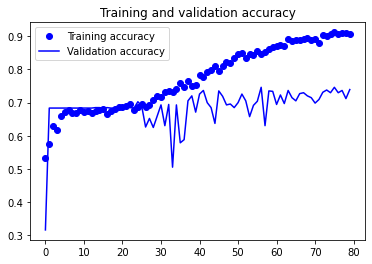

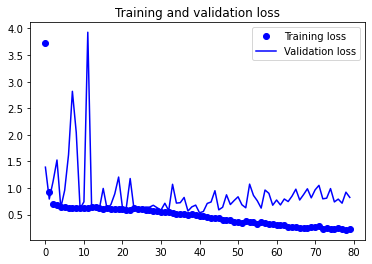

In [18]:
import matplotlib.pyplot as plt

accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
X_test_t = tf.constant(X_test)

In [20]:
ypred = model.predict(X_test_t)

115/115 [==============================] - 2s 11ms/step


In [21]:
for i, p in enumerate(ypred):
    if p > 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix


#test_labels_part = test_labels['Species'][0:499]
#print(test_labels_part)

In [23]:
print(accuracy_score(test_labels['Species'], ypred))

0.7833197056418643


In [24]:
confusion_matrix(test_labels['Species'], ypred)

array([[ 671,  512],
       [ 283, 2203]], dtype=int64)

No handles with labels found to put in legend.


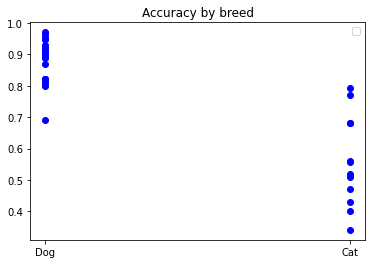

<Figure size 432x288 with 0 Axes>

Saint Bernard : 0.970000
Beagle : 0.960000
American bulldog : 0.950000
Basset hound : 0.950000
Newfoundland : 0.950000
Leonberger : 0.930000
Japanese chin : 0.920000
Pug : 0.920000
English setter : 0.910000
English cocker spaniel : 0.900000
German shorthair : 0.900000
Pyrenees : 0.900000
Havanese : 0.900000
Boxer : 0.898990
Keeshond : 0.898990
Pit bull : 0.890000
Staffordshire terrier : 0.887640
Pinscher : 0.870000
Samoyed : 0.820000
Shiba inu : 0.820000
Wheaten terrier : 0.820000
Scottish terrier : 0.818182
Yorkshire terrier : 0.808081
Pomeranian : 0.800000
Egyptian mau : 0.793814
British shorthair : 0.770000
Chihuahua : 0.690000
Maine coon : 0.680000
Russian blue : 0.680000
Sphynx : 0.560000
Abyssinian : 0.555556
Persian : 0.520000
Birman : 0.510000
Bengal : 0.470000
Siamese : 0.430000
Ragdoll : 0.400000
Bombay : 0.340909


In [26]:
ab_preds = ypred[0:99]
bull_preds = ypred[99:199]
pit_preds = ypred[199:299]
basset_preds = ypred[299:399]
beagle_preds = ypred[399:499]
bengal_preds = ypred[499:599]
bir_preds = ypred[599:699]
bomb_preds = ypred[699:787]
boxer_preds = ypred[787:886]
bshort_preds = ypred[886:986]
chi_preds = ypred[986:1086]
mau_preds = ypred[1086:1183]
span_preds = ypred[1183:1283]
setter_preds = ypred[1283:1383]
gshort_preds = ypred[1383:1483]
pyr_preds = ypred[1483:1583]
hava_preds = ypred[1583:1683]
chin_preds = ypred[1683:1783]
kee_preds = ypred[1783:1882]
leon_preds = ypred[1882:1982]
coon_preds = ypred[1982:2082]
pinsch_preds = ypred[2082:2182]
new_preds = ypred[2182:2282]
pers_preds = ypred[2282:2382]
pom_preds = ypred[2382:2482]
pug_preds = ypred[2482:2582]
rag_preds = ypred[2582:2682]
russ_preds = ypred[2682:2782]
bern_preds = ypred[2782:2882]
samo_preds = ypred[2882:2982]
terr_preds = ypred[2982:3081]
shiba_preds = ypred[3081:3181]
siam_preds = ypred[3181:3281]
sphynx_preds = ypred[3281:3381]
staff_preds = ypred[3381:3470]
wheat_preds = ypred[3470:3570]
york_preds = ypred[3570:3670]
img_names = test_labels['ImageID']

preds_list = [ab_preds, bull_preds, pit_preds, basset_preds, beagle_preds, bengal_preds, bir_preds, bomb_preds, boxer_preds, 
              bshort_preds, chi_preds, mau_preds, span_preds, setter_preds, gshort_preds, pyr_preds, hava_preds, chin_preds,
              kee_preds, leon_preds, coon_preds, pinsch_preds, new_preds, pers_preds, pom_preds, pug_preds, rag_preds, russ_preds,
              bern_preds, samo_preds, terr_preds, shiba_preds, siam_preds, sphynx_preds, staff_preds, wheat_preds, york_preds]

species_list = [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]

breed_accs = []
for i, breed in enumerate(preds_list):
    wrong = 0
    right = 0
    true_class = species_list[i]
    for j, p in enumerate(breed):
        if p==true_class:
            right += 1
        else:
            wrong +=1
    breed_accs.append(right/(right+wrong))

    
breed_names = ['Abyssinian', 'American bulldog', 'Pit bull', 'Basset hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer',
               'British shorthair', 'Chihuahua', 'Egyptian mau', 'English cocker spaniel', 'English setter', 'German shorthair',
               'Pyrenees', 'Havanese', 'Japanese chin', 'Keeshond', 'Leonberger', 'Maine coon', 'Pinscher', 'Newfoundland',
               'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian blue', 'Saint Bernard', 'Samoyed', 'Scottish terrier',
               'Shiba inu', 'Siamese', 'Sphynx', 'Staffordshire terrier', 'Wheaten terrier', 'Yorkshire terrier']

indices = []

copy = breed_accs.copy()

copy.sort(reverse=True)

scopy = []

for i, p in enumerate(copy):
    indices.append(breed_accs.index(p))
    breed_accs[indices[len(indices)-1]] = -1

bcopy = []
for i in indices:
    bcopy.append(breed_names[i])
    scopy.append(species_list[i])

    
species_list_str = []

for s in scopy:
    if s==0:
        species_list_str.append('Cat')
    else:
        species_list_str.append('Dog')

plt.plot(species_list_str, copy, 'bo', label='')
plt.title('Accuracy by breed')
plt.legend()
plt.figure()
plt.show()

for i,b in enumerate(bcopy):
    print(f"{b} : {copy[i]:4f}")

# Discussion and Analysis

The initial batch size was $64$, and number of epochs was $20$. I increased these as time went on, but the improvements to accuracy based on these hyperparameters alone were limited. I also began by resizing the images to $100 \times 100$ pixels, but I decided that might not provide sufficient information for a good model performance. However, when I increased this to $200 \times 200$, I found that I ran out of memory so I settled on $150 \times 150$.

I also observed signs of overfitting, so I added dropout layers to my model architecture.

My model demonstrated higher test accuracy on dogs than on cats, and since I had more dogs than cats early in the dataset, I figured this might have been caused by a too-high learning rate. I reduced the learning rate by half. This did not improve the model's performance, however.

# Conclusion

In summary, in this project I trained a convolutional neural network, using the TensorFlow and Keras libraries in Python, to classify images of pets as either a dog or a cat, making this a binary classification problem.

I obtained the dataset and performed basic analysis and cleaning, and made some changes to how I processed the data to improve performance of the model.

 I then conducted an iterative process to improve the model by adding, removing, or modifying layers and adjusting hyperparameters, with the ultimate goal of maximizing accuracy. Accuracy did improve over the course of this process, but not as much as I had hoped.

Some of the failings of my model might be related to the data I used or how I processed it. I still would like to attempt training the model on more data, and observe any changes or improvements.

Although my model does not predict species as well as other related models that I studied (final test accuracy was 78.33%), I found this to be a valuable learning experience as to what works and what does not work when it comes to convolutional neural networks, and machine learning in general.

# References

1. Parki, O.M., Vedaldi, A., Zisserman, A., & Jawahar, C.V. (2012). Oxford-IIIT Pet Dataset. [Data set]. University of Oxford.
2. DataCamp. (2017, December 5). Convolutional Neural Networks in Python with Keras. DataCamp. Retrieved August 1, 2022, from https://www.datacamp.com/tutorial/convolutional-neural-networks-python 